# Linear convection

In [2]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import time, sys

Equation that will be solved is

$$
\dfrac{\partial u}{\partial t} + c \dfrac{\partial u}{\partial x} =0
$$

having the initial conditions: $u(x,0)=u_0(x)$. The exact solution of the equation is $u(x,t)=u_0(x-ct)$ - although this is 'unknown'

Discretization of the equation will be done in:
* Forward difference scheme for Time derivative
* Backward difference scheme for Space derivative

Discretization will be done in the $x$ coordinate transformed into points from $i=0,...,N$ and in the time coordinate of intervals of size $\Delta t$. Using the definition of derivative:

$$
\dfrac{\partial u}{\partial x} \approx \dfrac{u(x+\Delta x)-u(x)}{\Delta x}
$$

the first equation can be transformed into:

$$
\dfrac{u(t+\Delta t)-u(t)}{\Delta t}+c\dfrac{u(x+\Delta x)-u(x)}{\Delta x}=0
$$

Using $n$ (and $n+1$) as consecutive steps in time and $i$ (and $i-1$) as two neighboring points, equation ends being:

$$
\dfrac{u^{n+1}_{i}-u^{n}_{i}}{\Delta t}+c\dfrac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x}=0
$$

As initial conditions are known, the only variable in the equation is $u^{n+1}_{i}$. Solving for it, the result is:

$$
u^{n+1}_{i}=u^n_i-c\dfrac{\Delta t}{\Delta x} \left( u^{n}_{i}-u^{n}_{i-1} \right)
$$

In [55]:
nx = 41        #number of x-axis divisions
dx = 2/(nx-1)  #delta x
nt = 25        #number of timesteps 
dt = 0.025     #delta t
c = 1          #wavespeed

Initial conditions are given by the next function:
$$u_0 = \begin{Bmatrix} 2 & \text{ if } 0.5 \leqslant x \leqslant 1 \\ 1 & \text{everywhere else in }(0,2) \end{Bmatrix}$$

In [77]:
u = np.ones(nx)
u[int(0.5/dx):int(1/dx+1)] = 2
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


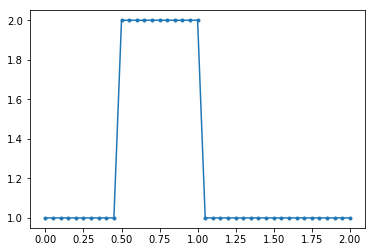

In [78]:
plt.plot(np.linspace(0,2,nx),u,'.-')

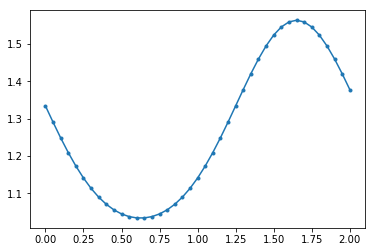

In [89]:
un = np.zeros(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i] - c * dt/dx *(un[i]-un[i-1])
        
plt.plot(np.linspace(0,2,nx),u,'.-')